In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
cols = ['sentiment', 'id', 'date', 'query_string', 'user', 'text']

In [19]:
train = pd.read_csv('training.1600000.processed.noemoticon.csv', header=None, names=cols, encoding="ISO-8859-1")

In [20]:
train.head()

,sentiment,id,date,query_string,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [21]:
train['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

Hence, there are 800000 positive tweets and 800000 negative tweets. There are no neutral tweets in the dataset.


In [22]:
train['query_string'].value_counts()

NO_QUERY    1600000
Name: query_string, dtype: int64

In [23]:
train.drop(['id', 'date', 'query_string', 'user'], axis=1, inplace=True)

In [24]:
train.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [25]:
train[train['sentiment']==0].head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [26]:
train[train['sentiment']==4].head()

,sentiment,text
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...
800002,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,4,Being sick can be really cheap when it hurts t...
800004,4,@LovesBrooklyn2 he has that effect on everyone


Hence, the first 800000 queries are negative. While the next 800000 queries are positive.

# Preparing the data

In [27]:
train['Preclean_Length'] = train['text'].apply(lambda x: len(x))

In [28]:
train.head()

,sentiment,text,Preclean_Length
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",115
1,0,is upset that he can't update his Facebook by ...,111
2,0,@Kenichan I dived many times for the ball. Man...,89
3,0,my whole body feels itchy and like its on fire,47
4,0,"@nationwideclass no, it's not behaving at all....",111


C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


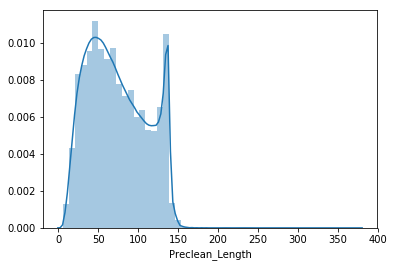

In [30]:
sns.distplot(train['Preclean_Length'])

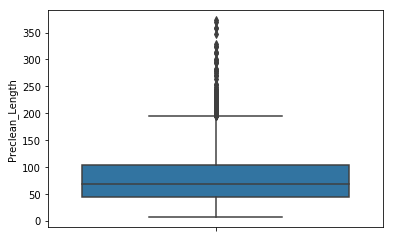

In [34]:
sns.boxplot(y='Preclean_Length', data=train)

In [32]:
train[train['Preclean_Length']>140].head()

,sentiment,text,Preclean_Length
213,0,Awwh babs... you look so sad underneith that s...,142
226,0,Tuesdayï¿½ll start with reflection ï¿½n then a...,141
279,0,Whinging. My client&amp;boss don't understand ...,145
343,0,@TheLeagueSF Not Fun &amp; Furious? The new ma...,145
400,0,#3 woke up and was having an accident - &quot;...,144


Hence, some tweets are more than 140 characters long. We need to clean the data.

# Cleaning the data

### HTML Decoding

In [35]:
train['text'][213]

"Awwh babs... you look so sad underneith that shop entrance of &quot;Yesterday's Musik&quot;  O-: I like the look of the new transformer movie "

In [44]:
import html

In [45]:
tweet = html.unescape(train['text'][213])

In [46]:
tweet

'Awwh babs... you look so sad underneith that shop entrance of "Yesterday\'s Musik"  O-: I like the look of the new transformer movie '